In [ ]:
!pip install 

Перевод цельсия в фаренгейты
Обучение нейрона

F = C*1.8 +32

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten



2025-11-28 11:18:47.871441: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


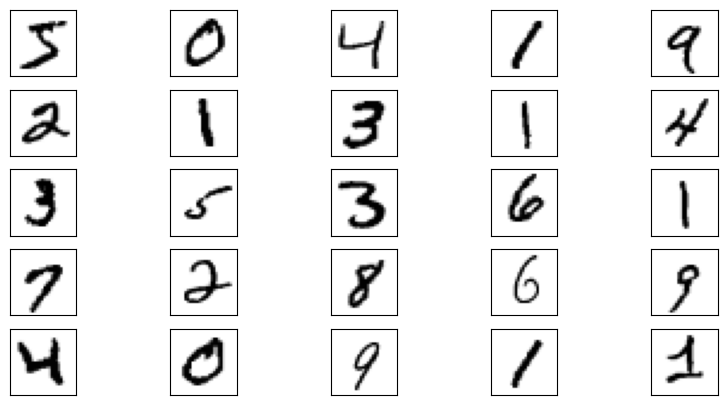

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#Нормализация
x_train = x_train / 255
x_test = x_test / 255

#Преобразование выходных значений в векторы по категориям
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()



In [ ]:
model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(512, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

myAdam = keras.optimizers.Adam(learning_rate=0.1)
myOpt = keras.optimizers.SGD(learning_rate=0.1, momentum=0.0, nesterov=True)
print(model.summary())

/home/user/.venvs/gptlab/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
I0000 00:00:1764317936.737396   27506 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9418 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:03:00.0, compute capability: 8.6


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 468,874 (1.79 MB)

 Trainable params: 468,874 (1.79 MB)

 Non-trainable params: 0 (0.00 B)

None


Компиляция HC с оптмизацией по Adam и критерием - категориальная кросс-энтропия

In [ ]:
model.compile(optimizer=myOpt,
            loss='categorical_crossentropy',
            metrics=['accuracy'])


Запуск процесса обучения: 80% - обучающая выборка, 20% - валидационная

In [7]:
model.fit(x_train, y_train_cat, batch_size=32, epochs=6, validation_split=0.2)

Epoch 1/6


2025-11-28 11:19:54.364360: I external/local_xla/xla/service/service.cc:163] XLA service 0x7f032c0040c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-11-28 11:19:54.364403: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2025-11-28 11:19:54.391711: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-11-28 11:19:54.534422: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91301
2025-11-28 11:19:54.563992: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-11-28 11:19:54.564076: I e

  46/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2592 - loss: 45.7732 

I0000 00:00:1764317998.372751   27597 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.2414 - loss: 2.5931 - val_accuracy: 0.1082 - val_loss: 2.3084
Epoch 2/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.1024 - loss: 2.3138 - val_accuracy: 0.0989 - val_loss: 2.3131
Epoch 3/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.1034 - loss: 2.3137 - val_accuracy: 0.0995 - val_loss: 2.3168
Epoch 4/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.1038 - loss: 2.3134 - val_accuracy: 0.1060 - val_loss: 2.3103
Epoch 5/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.1026 - loss: 2.3150 - val_accuracy: 0.0956 - val_loss: 2.3091
Epoch 6/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.1052 - loss: 2.3127 - val_accuracy: 0.0997 - val_loss: 2.3072


In [26]:
model.evaluate(x_test, y_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9761 - loss: 0.1366


[0.13660721480846405, 0.9761000275611877]

Проверка распознавания цифр

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[1.7501801e-12 1.0815756e-11 1.0000000e+00 6.6180297e-14 3.4287553e-29
  7.9471926e-15 7.3692468e-13 2.0795246e-23 1.1817739e-12 1.9894351e-23]]
Распознанная цифра: 2


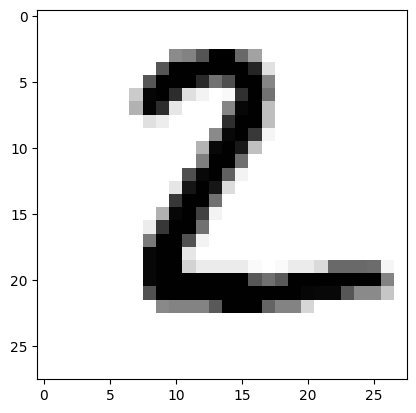

In [14]:
n = 1
x = np.expand_dims(x_test[n], axis=0)
res = model.predict(x)
print( res )
print( f"Распознанная цифра: {np.argmax(res)}" )

plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()

Распознавание всей тестовой выборки

In [18]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

print(pred.shape)

print(pred[:20])
print(y_test[:20])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
(10000,)
[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


Выделение неверных вариантов

In [21]:
mask = pred == y_test
print(mask[:10])

x_false = x_test[~mask]
p_false = pred[~mask]

print(x_false.shape)


[ True  True  True  True  True  True  True  True False  True]
(243, 28, 28)


Значение сети: 7


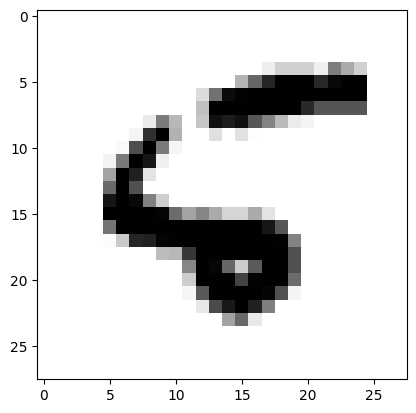

Значение сети: 2


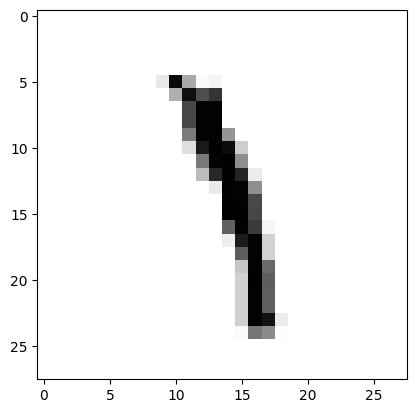

Значение сети: 1


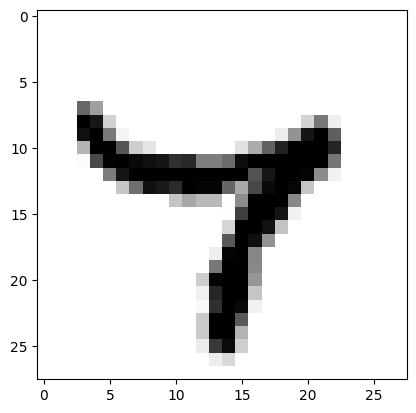

Значение сети: 0


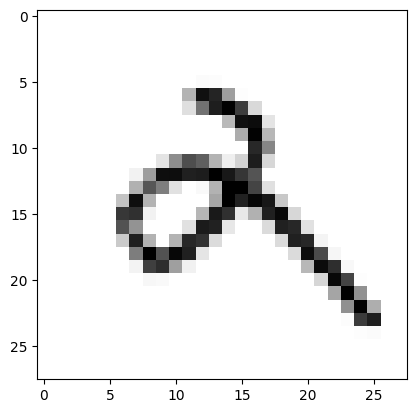

Значение сети: 4


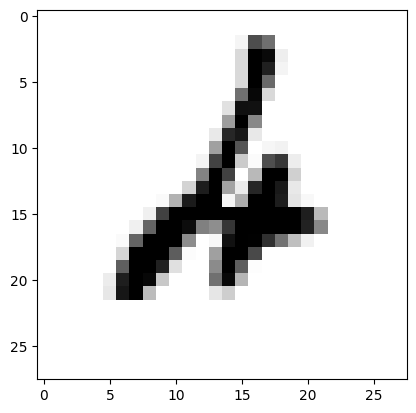

In [22]:
for i in range(5):
    print("Значение сети: "+str(y_test[i]))
    plt.imshow(x_false[i], cmap=plt.cm.binary)
    plt.show()